# Ion Acoustic Waves, Fluid Theory, Plasma Response, and Kinetic Effects

In this notebook, we use fluid thoery to discuss ion acoustic waves, and compare the theoretical results we obtain with plots made using the PIC code OSIRIS.

In this project, you will be simulating plasmas with the electrostatic code OSIRIS.   The normalization of the code is $\omega_p = 1$, and the speed of light is normalized to $c=1$.  Therefore, grid size is normalized to the electron skin depth $c/\omega_{p}$.


Each plasma electron is initialized with positions (only in x) such that the density is uniform. The ions are initialized at the same positions but with a larger mass ($M_i/m_e = 100$).  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction.  To speed up the simulations, we reduced the separation of the electron and ion timescale by using a reduced ion mass of $M/m=100$.  The kinetic nature of IAW can be explored by adjusting the temperature ratio of $T_e/T_i = (m v_{te}^2)/(M v_{ti}^2)$ which in term adjusts the ratio of $C_s/v_{ti}$



The cell below calculates the fluid dispersion relation for IAW

## Simulations using OSIRIS

The notebook contains 4 example simulations, they are:

Now try running some simulations using the PIC code UPIC-ES.  We'll use the simulation to generate dispersion relations for a few different cases, and see how the results compare to our fluid theory.

### IAW from Natural Noise

$\textbf{Case 1: Cold Ions}$  




In [1]:
# Run this cell to load the libraries

import sys                                    # comment out in main version
sys.path.insert(0, '/home/jovyan/analysis')   # comment out in main version
import osiris
import osh5io
import osh5vis

import matplotlib.pyplot as plt
import osh5visipy
import h5_utilities

%matplotlib notebook


Importing osh5visipy. Please use `%matplotlib notebook' in your jupyter/ipython notebook


In [ ]:


dirname = 'iaw-cold-os'
osiris.runosiris(rundir=dirname, inputfile='./iaw-cold-driven-os.txt')

## Hit <shift>+<return> to run case A


<IPython.core.display.Javascript object>


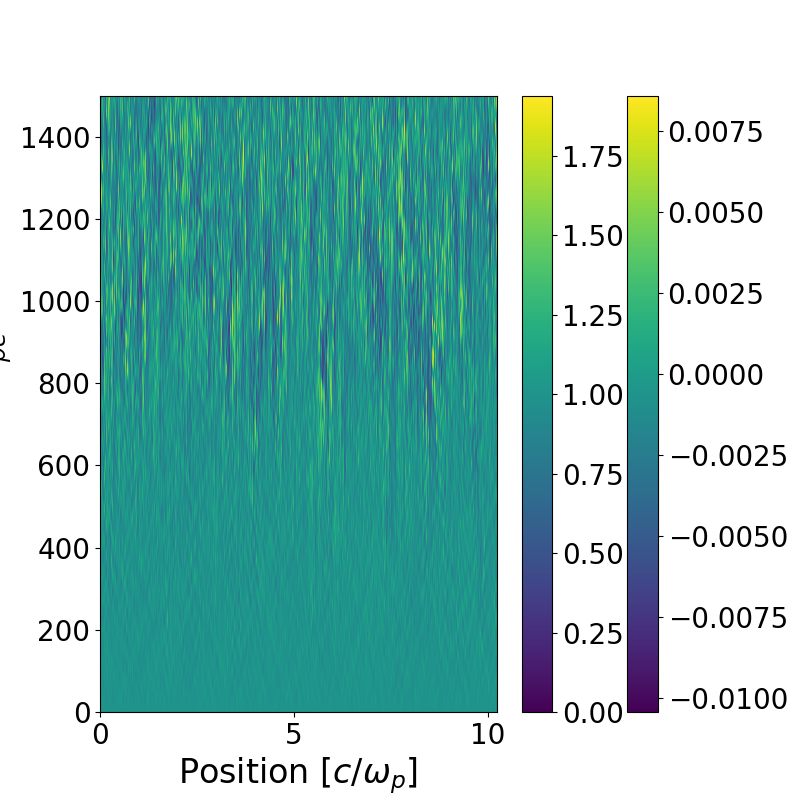

(<matplotlib.image.AxesImage at 0x7fedb4351250>,
 <matplotlib.colorbar.Colorbar at 0x7fedb43e2e10>)

In [2]:
# Here we read the time history data from the simulation
undriven_cold=osiris.read('iaw-cold-os')
#

import matplotlib.pyplot as plt
import osh5io
import osh5vis
import osh5visipy
import h5_utilities
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,8))
plt.xlabel('Position [$c/\omega_p$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')
h5_utilities.plotme(undriven_cold.e1)


h5_utilities.plotme(undriven_cold.ions)

Now let's look at ion phase space

<IPython.core.display.Javascript object>


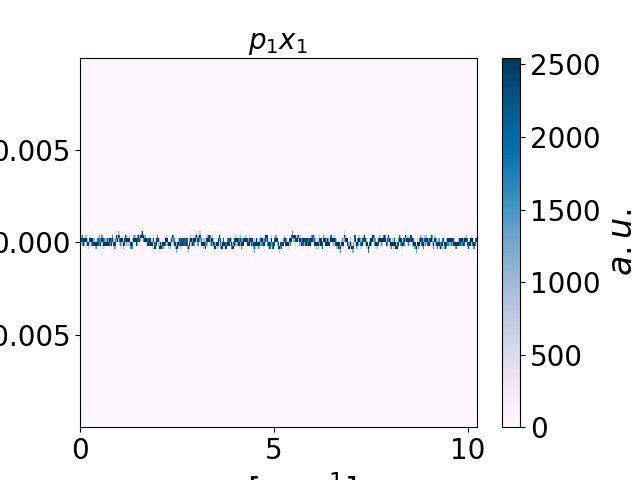

In [3]:
# %matplotlib notebook
import osh5visipy
import matplotlib.colors as colors
osh5visipy.slicer_w('/home/jovyan/work/JupyterPIC/iaw-cold-os/MS/PHA/p1x1/ions/',figsize=(8,8)
                   ,norm=colors.LogNorm(vmin=0.00001,vmax=900),cmap='PuBu')

Once the simulation is complete.  Execute the next cell to plot the dispersion function generated by the simulation, you can choose to look at either the longitudinal electric field ('e1') or the ion density ('ions').  The dispersion relation is plotted   

<IPython.core.display.Javascript object>


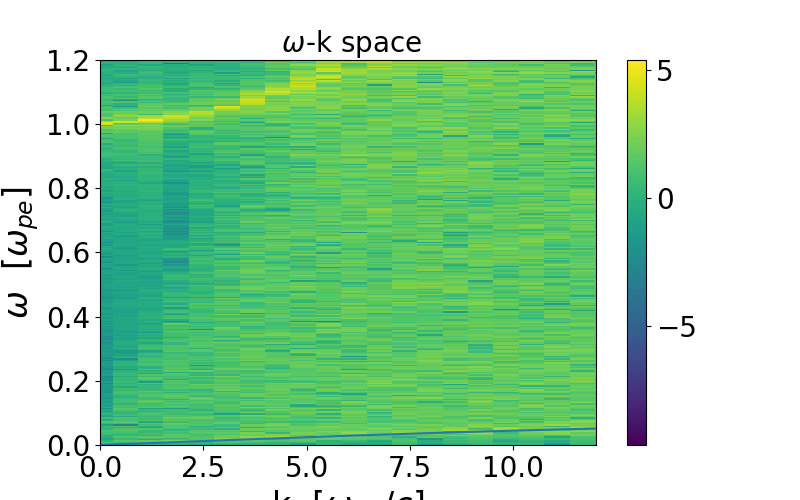

In [4]:
osiris.wk_os_iaw(rundir='iaw-cold-os', field='e1', wlim=[0,1.2], klim=[0,12], vtx=0.05, show_theory=True)

That looks strangely familiar.  Try plotting it again with the theory curve you generated before plotted on top.

<IPython.core.display.Javascript object>


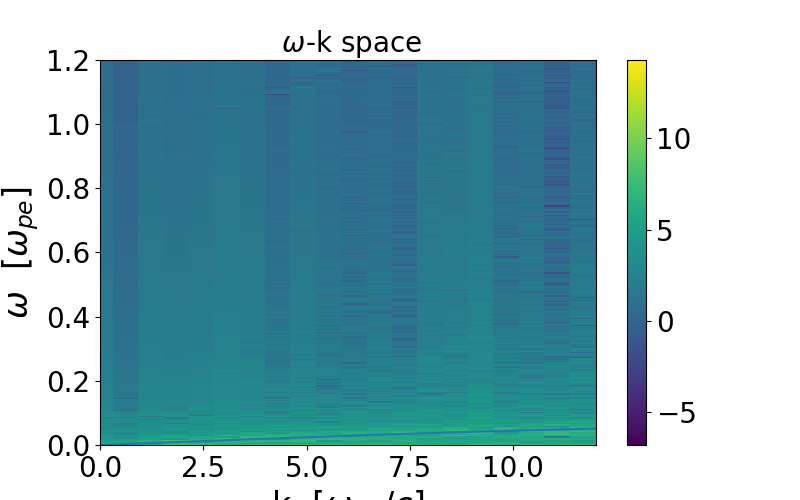

In [5]:
osiris.wk_os_iaw(rundir='iaw-cold-os', field='ions', wlim=[0,1.2], klim=[0,12], vtx=0.05, show_theory=True)

Amazing!  Seems like our fluid theory is doing a pretty great job.  Lets try changing up the parameters just to make sure it's really as great as we think it is.

$\textbf{Case 2: Warm Ions}$  
This time, we'll run a case where the ions are a bit warmer compared to the electrons.  We'll set $T_e/T_i = 20$.  This time, then, we'll have $\bar{v}_e \approx 40 \sqrt{20}  \ \bar{v}_i$.  Plot the distribution functions for this case in the cell below.

In [ ]:


dirname = 'iaw-warm-os'
osiris.runosiris(rundir=dirname, inputfile='./iaw-warm-os.txt')

## Hit <shift>+<return> to run case A


<IPython.core.display.Javascript object>


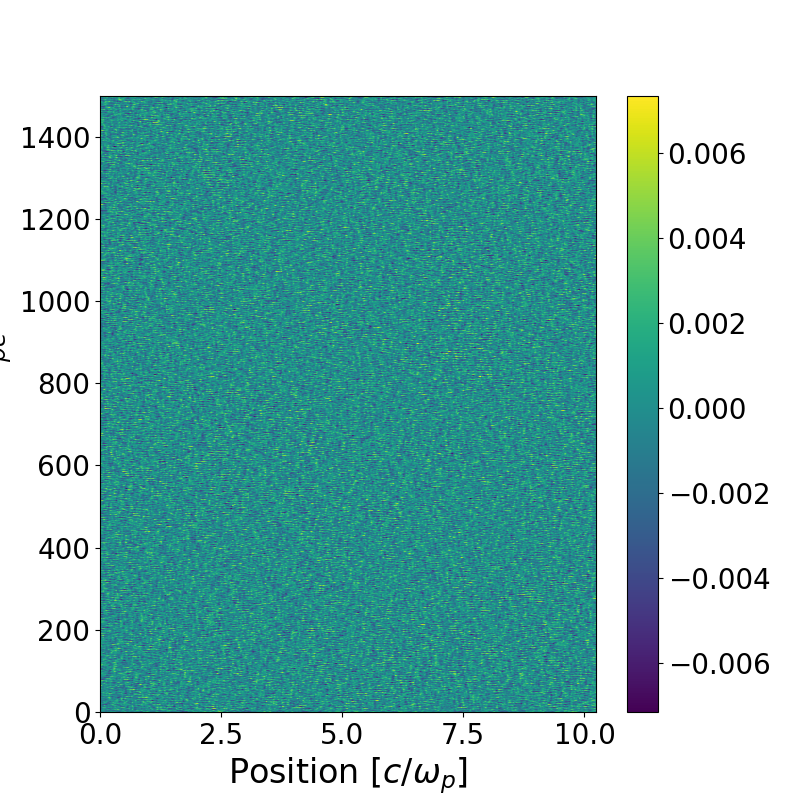

(<matplotlib.image.AxesImage at 0x7feda7708e10>,
 <matplotlib.colorbar.Colorbar at 0x7feda7758790>)

In [6]:
# Here we read the time history data from the simulation
undriven_warm=osiris.read('iaw-warm-os')
#


SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,8))
plt.xlabel('Position [$c/\omega_p$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')




h5_utilities.plotme(undriven_warm.e1)


<IPython.core.display.Javascript object>


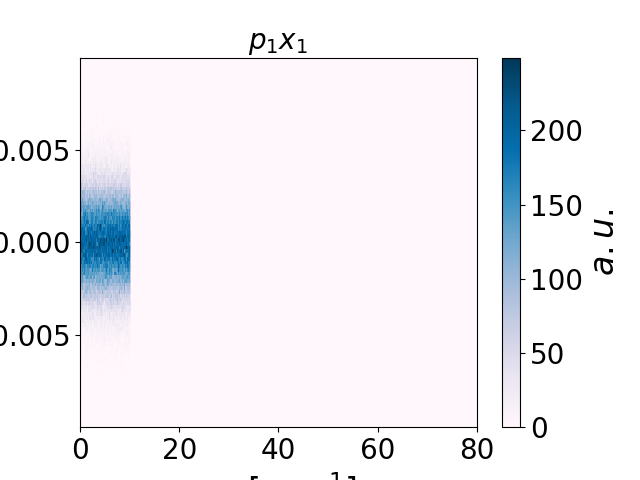

In [7]:

import osh5visipy
import matplotlib.colors as colors
osh5visipy.slicer_w('/home/jovyan/work/JupyterPIC/iaw-warm-os/MS/PHA/p1x1/ions/',figsize=(8,8)
                   ,norm=colors.LogNorm(vmin=0.00001,vmax=900),cmap='PuBu')

Again, this may take a while.  Once it's complete, try plotting the dispersion realation along with our fluid theory prediction.

<IPython.core.display.Javascript object>


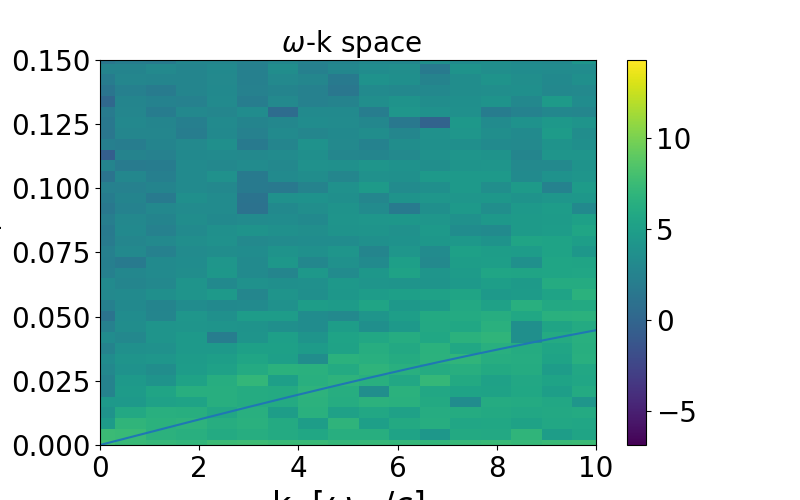

In [8]:
osiris.wk_os_iaw(rundir='iaw-warm-os', field='ions', wlim=[0,0.15], klim=[0,10], vtx=0.05, show_theory=True)

Clearly the agreement isn't so good anymore.  While the general shape of the fluid theory curve is still there, it looks washed out - far from the clean line fluid theory predicted.  Something is definitely wrong here.  Can you think what the problem might be?  Go back to the derivation and think about the assumptions we made?  Do they hold in this case?

### Driven IAW

Here the plasma conditions are the same as above, except that we drive the IAW very close to the dispersion curve to look at the plasma's response to the external driver.  In this case, the system is driven at mode 12 $k \Delta x = 0.294$, the driver's frequency is $\omega_0/\omega_{pe} = 0.06$ which sits near the fluid dispersion curve.  The period of the wave is roughly $105 /\omega_{pe}$ and the external driver is left on for $ 100/\omega_{pe}$.  The amplitude of the external driver is $0.075$.  

$\textbf{Case 1: Cold Ions}$  
First, we'll run a case where the ions are cold compared to the electrons by setting $T_e/T_i = 100$.  Recalling what we learned in the introduction, we see that in this case $\bar{v}_e \approx 400  \ \bar{v}_i$.  That is, the electron distribution is super flat compared to the ion distribution.  Run the cell below to see just how flat "flat" is.

In [ ]:


dirname = 'iaw-cold-driven-os'
osiris.runosiris(rundir=dirname, inputfile='iaw-cold-driven-os.txt')

## Hit <shift>+<return> to run case A


Now let's look at the ion response.

<IPython.core.display.Javascript object>


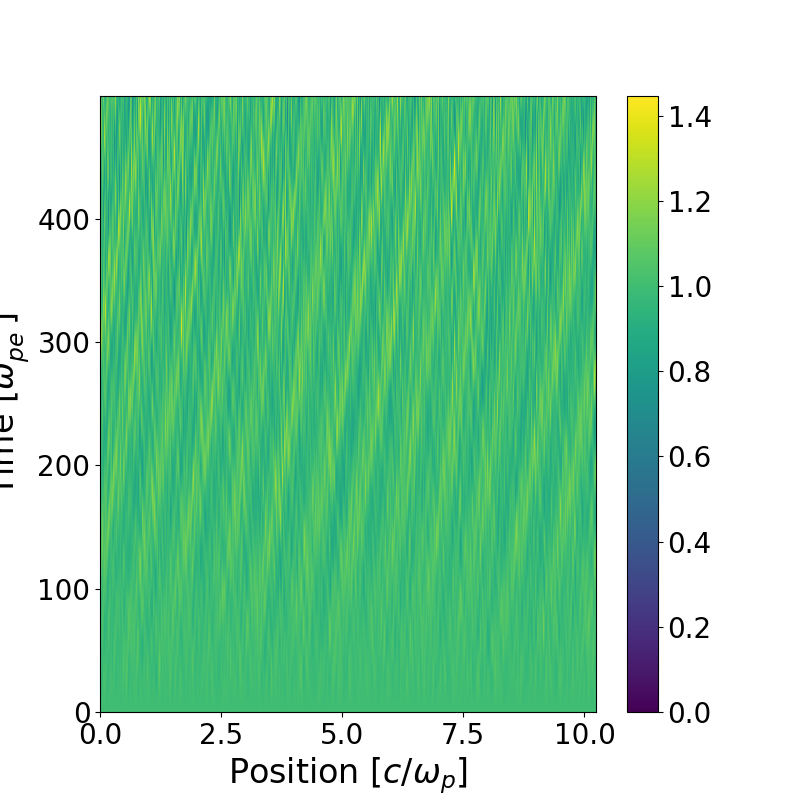

(<matplotlib.image.AxesImage at 0x7feda74beed0>,
 <matplotlib.colorbar.Colorbar at 0x7feda745b6d0>)

In [9]:
# Here we read the time history data from the simulation
driven_cold=osiris.read('iaw-cold-driven-os')
#


SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,8))
plt.xlabel('Position [$c/\omega_p$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')




h5_utilities.plotme(driven_cold.ions)


Let's look at ion phase space here

<IPython.core.display.Javascript object>


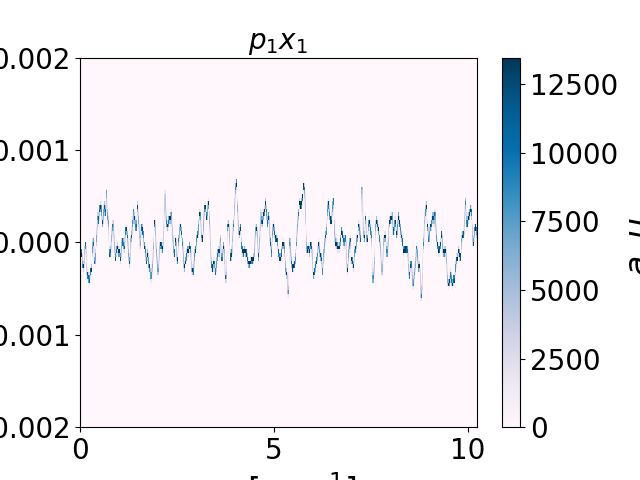

In [10]:
import osh5visipy
import matplotlib.colors as colors
osh5visipy.slicer_w('/home/jovyan/work/JupyterPIC/iaw-cold-driven-os/MS/PHA/p1x1/ions/',figsize=(8,8)
                   ,norm=colors.LogNorm(vmin=0.00001,vmax=900),cmap='PuBu')

Here we look at the dispersion relation:

In [ ]:
osiris.wk_os_iaw(rundir='iaw-cold-driven-os', field='ions', wlim=[0,0.15], klim=[0,10], vtx=0.05, show_theory=True)

#### 𝐂𝐚𝐬𝐞 2: Warm 𝐈𝐨𝐧𝐬 
First, we'll run a case where the ions are cold compared to the electrons by setting 𝑇𝑒/𝑇𝑖=9. Recalling what we learned in the introduction, we see that in this case 𝑣¯𝑒≈400 𝑣¯𝑖. That is, the electron distribution is super flat compared to the ion distribution. Run the cell below to see just how flat "flat" is.

Now let's look at the ion response.

In [ ]:


dirname = 'iaw-warm-driven-os'
osiris.runosiris(rundir=dirname, inputfile='iaw-warm-driven-os.txt')

## Hit <shift>+<return> to run case A


In [ ]:
# Here we read the time history data from the simulation
driven_warm=osiris.read('iaw-warm-driven-os')
#


SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,8))
plt.xlabel('Position [$c/\omega_p$]')
plt.ylabel('Time [$\omega_{pe}^{-1}$]')




h5_utilities.plotme(driven_warm.ions)


In [ ]:
# import osh5visipy
import matplotlib.colors as colors

osh5visipy.slicer_w('/home/jovyan/work/JupyterPIC/iaw-warm-driven-os/MS/PHA/p1x1/ions/',figsize=(8,8)
                   ,norm=colors.LogNorm(vmin=0.00001,vmax=900),cmap='PuBu')

In [ ]:
osiris.wk_os_iaw(rundir='iaw-warm-driven-os', field='ions', wlim=[0,0.2], klim=[0,12], vtx=0.05, show_theory=True)